In [7]:
import starry
import numpy as np
import lightkurve
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

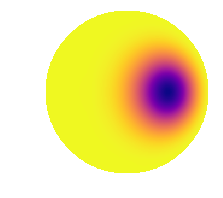

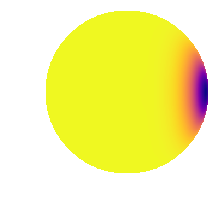

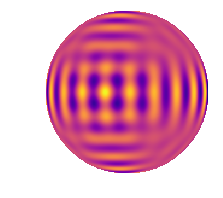

In [60]:
#maximum order, no need to change
lmax=20
star= starry.Map(lmax)


#change values to change starspot
#spot size
sigma= .3
#spot darkness, - is dark spot, + is light spot
amp= -0.5
#latitute and longitude of spot
lat= 0
lon= 30
#rotation period for spot in days
P= 9.1665


star.add_gaussian(sigma=sigma, amp=amp, lat=lat, lon=lon)


#can add more spots to the star like this
#star.add_gaussian(sigma= .1, amp= -.3, lat= 0, lon= 60)


#show star from different angles
star.rotate(0)
star.show()

star.rotate(45)
star.show()

star.rotate(90)
star.show()





In [71]:
#compute lightcurve with 1000 points over 100 days
min_day= 170
max_day= 190
time = np.linspace(min_day, max_day, 10000)
theta= 360/P*time


In [74]:
id= 8817885

lcfall = lightkurve.search_lightcurvefile(id).download_all()

lcf1 = lightkurve.search_lightcurvefile(id, quarter=lcfall[1].quarter).download().PDCSAP_FLUX.remove_nans().normalize()
n= len(lcfall)
for q in range (1, n): 
    lcf2 = lightkurve.search_lightcurvefile(id, quarter=lcfall[q].quarter).download().PDCSAP_FLUX.remove_nans().normalize()
    print(lcf2.quarter)
    lcf1= lcf1.append(lcf2)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


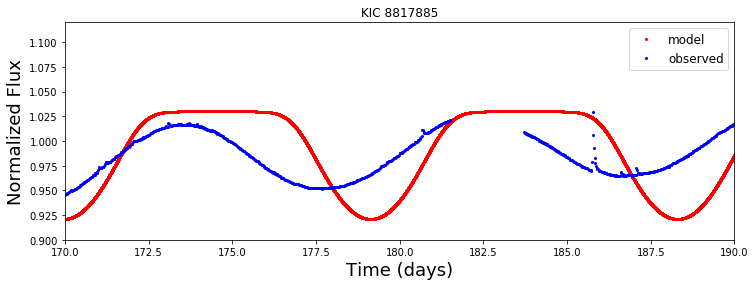

In [73]:
flux = star.flux(theta=theta)
fig, ax = plt.subplots(1, figsize=(12, 4))
plt.plot(time, flux, 'ro', ms= 2, label= 'model')
plt.plot(lcf1.time, lcf1.flux, 'bo', ms= 2, label= "observed")
plt.xlabel('Time (days)', fontsize=18);
plt.ylabel('Normalized Flux', fontsize=18);
plt.ylim(.9, 1.12)
plt.title('KIC ' + str(id))
plt.xlim(min_day, max_day)
plt.legend(fontsize= 'large')